# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [1]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.9.2'

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [2]:
from tensorflow import keras
keras.__version__

'2.9.0'

In [3]:
keras.layers.Dense(10, activation='sigmoid')

In [4]:
keras.Model()

Metal device set to: Apple M1 Pro


2022-08-11 23:15:32.808850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-11 23:15:32.808974: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [6]:
from keras.layers import Dense, Input, Flatten, Activation
from keras.models import Sequential
from keras import Model


In [7]:
Dense(10, activation='relu')

In [8]:
Flatten(input_shape=(100,))

In [9]:
X_train = np.random.randn(5500, 2)
Input(shape=X_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

## 주요 레이어

### Dense
- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치(Xavier 초기), zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [10]:
dense = Dense(10, activation='relu',name='Dense_Layer')

In [11]:
dense

In [12]:
dense2 = Dense(15, activation='sigmoid')

In [13]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [14]:
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)
dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [15]:
flatten = Flatten(input_shape=(128,128))
flatten

  ### Input
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- 'summary()' 메소드를 통해서는 보이지 않음

In [16]:
input_1 = Input(shape=(28,28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [17]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [18]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_3')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [19]:
from keras.layers import Dense, Input, Flatten
from keras.models import Model, Sequential
from keras.utils import plot_model

In [20]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


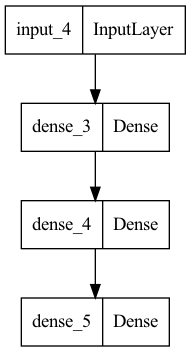

In [22]:
plot_model(model)

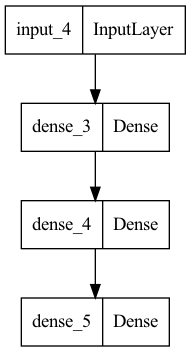

In [23]:
plot_model(model, to_file='model.png')

In [24]:
model = Sequential([
    Input(shape=(28,28), name='Input'),
    Dense(300, activation='relu',name='Dense1'),
    Dense(100, activation='relu',name='Dense2'),
    Dense(10, activation='softmax',name='Output'),
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


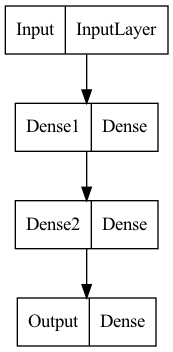

In [26]:
plot_model(model)

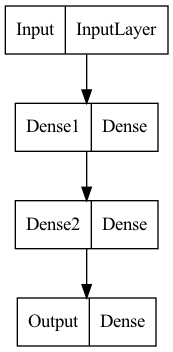

In [27]:
plot_model(model, to_file='model2.png')

### 함수형 API

- 가장 권장되는 방벚

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [28]:
from keras import Model
from keras.layers import Dense, Flatten, Input
from keras.utils import plot_model

In [29]:
inputs = Input(shape=(28,28,1))

x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [30]:
model = Model(inputs, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


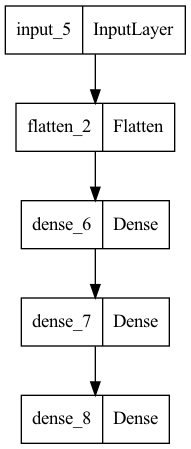

In [31]:
plot_model(model)

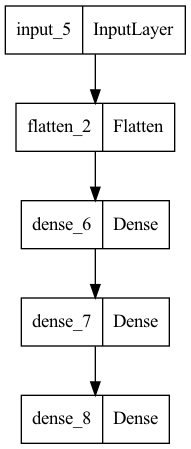

In [32]:
plot_model(model, to_file='model3.png')

In [33]:
from keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(input_layer, output)

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 28, 100)      2900        ['input_6[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 28, 10)       1010        ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 38)       0           ['input_6[0][0]',                
                                                                  'dense_10[0][0]']         

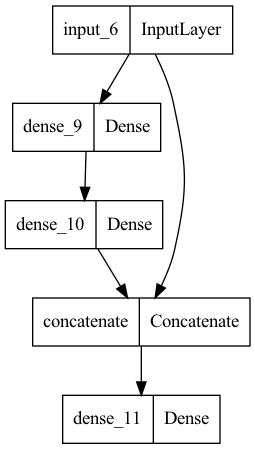

In [35]:
plot_model(model)

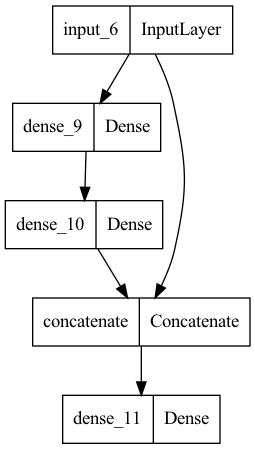

In [36]:
plot_model(model, to_file='model4.png')

In [37]:
input_1 = Input(shape=(12,), name='input_1')
input_2 = Input(shape=(5,), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='Output')(concat)
model = Model([input_1, input_2], output)

In [38]:
Dense(1, activation='sigmoid', name='Output')(concat)

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Output')>

In [39]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 100)          600         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 10)           1010        ['dense_12[0][0]']               
                                                                                            

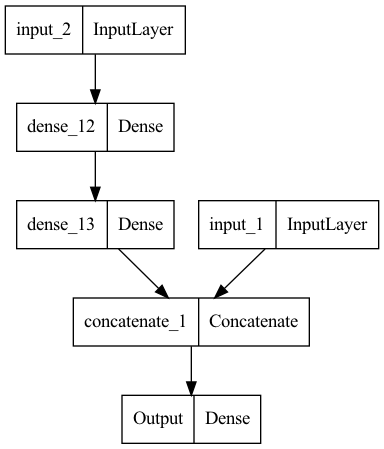

In [40]:
plot_model(model)

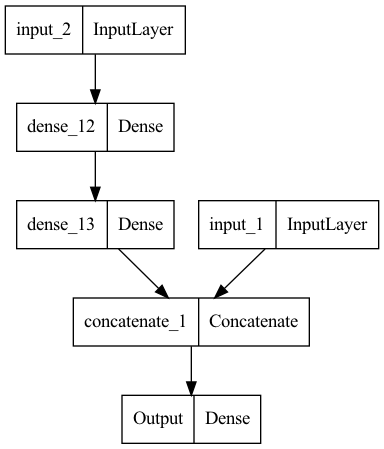

In [41]:
plot_model(model, to_file='model5.png')

In [42]:
input_ = Input((10,10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')
output = output(hidden2)

sub_out = Dense(1, name='sum_output')(hidden2)
model = Model(input_, [output, sub_out])


In [43]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_15 (Dense)               (None, 10, 10)       1010        ['dense_14[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_15[0][0]']               
                                                                                            

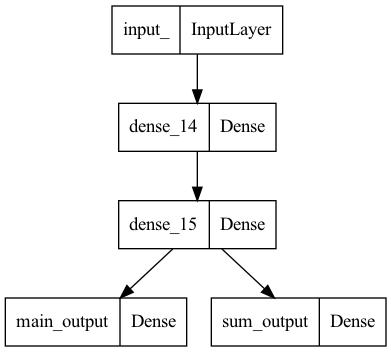

In [44]:
plot_model(model)

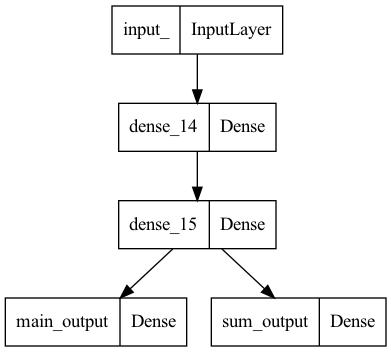

In [45]:
plot_model(model, to_file='model6.png')

In [46]:
input_1 = Input((10,10), name='input_1')
input_2 = Input((10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)

concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs = [output, sub_out])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 10)       1010        ['dense_16[0][0]']               
                                                                                            

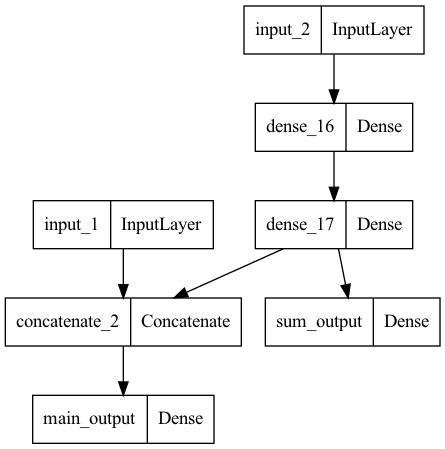

In [47]:
plot_model(model, to_file='model7.png')

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

In [48]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.utils import plot_model


In [49]:
class MyModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        #파이썬 2.X 버전 모델
        #super(MyModel, self).__init__(**kwargs)
        super().__init__(**kwargs)

        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation= activation)
        self.out_layer = Dense(10, activation='softmax')


    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.out_layer(x)
        return x



In [50]:
class Car():

    def __init__(self, name, user):
        self.name = name
        self.user = user

    def run(self):
        print("차가 달립니다.")


class Truck(Car):
    # 이 아래에서 __init__ 메소드를 오버라이드 하세요.
    def __init__(self, *args, **kwargs):
        #super(Truck, self).__init__(name)
        super().__init__(*args, **kwargs)

    def load(self):
        print("짐을 실었습니다.")


a = Truck(user='b',name='a')
a.name

'a'

## 모델 가중치 확인

In [51]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.utils import plot_model

In [52]:
inputs =Input(shape=(28,28,1))
x =Flatten(input_shape=(28,28,1))
x = x(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs, x)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


모델의 레이어들이 리스트로 표현됨

In [53]:
model.layers

### 이름확인하기

In [54]:
hidden_2 = model.layers[2]

# 이름
hidden_2.name

'dense_18'

위의 layer name 참고

In [55]:
model.get_layer('dense_18') is hidden_2

True

In [56]:
w, b= hidden_2.get_weights()

In [57]:
w

array([[-0.02800443,  0.04855824,  0.02751914, ...,  0.00960008,
        -0.00796123, -0.0133522 ],
       [ 0.01611954,  0.00144831, -0.02820668, ...,  0.00065094,
         0.01651683,  0.04379861],
       [-0.0437861 ,  0.00658993, -0.05881778, ..., -0.04739716,
        -0.03433928,  0.03154709],
       ...,
       [-0.00350509,  0.04625763,  0.02062563, ...,  0.03252264,
        -0.00028712, -0.05172993],
       [ 0.04167175,  0.01196171,  0.00652634, ..., -0.07023708,
         0.03556088,  0.0264007 ],
       [ 0.01406019, -0.02540822, -0.0418445 , ..., -0.06002566,
        -0.03875675, -0.05263955]], dtype=float32)

In [58]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 그림으로 생각하기
### 행렬 표시!!

In [59]:
import pandas as pd

w_df = pd.DataFrame(w)
w_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.028004,0.048558,0.027519,-0.073400,0.042778,-0.016271,-0.030856,0.073233,0.068164,0.008367,...,0.027143,-0.048359,-0.012451,0.049423,-0.027726,-0.051891,-0.039267,0.009600,-0.007961,-0.013352
1,0.016120,0.001448,-0.028207,-0.062652,0.011581,-0.050238,0.019488,0.033551,0.050487,0.059345,...,-0.008846,0.020742,0.034597,0.024191,0.019993,-0.052255,-0.001345,0.000651,0.016517,0.043799
2,-0.043786,0.006590,-0.058818,-0.009100,-0.045810,-0.013510,0.020117,0.067146,-0.001119,-0.060856,...,0.043722,0.003909,0.047031,-0.044841,-0.056071,0.014329,-0.063471,-0.047397,-0.034339,0.031547
3,-0.027643,-0.051228,0.013913,-0.042873,-0.064237,0.024674,-0.069966,-0.062713,-0.005856,0.050792,...,0.021213,-0.002593,-0.017597,-0.012705,-0.059090,0.021129,0.006509,-0.042423,0.069615,-0.054923
4,-0.073693,-0.065014,0.061325,-0.005790,-0.048728,0.059612,0.010436,-0.032345,-0.057549,0.056532,...,-0.067018,0.035977,0.047357,-0.038129,0.019648,-0.066204,-0.034942,0.031129,0.064709,0.036470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.023206,0.072588,-0.035404,0.012925,0.061085,-0.035168,0.060566,0.074006,-0.061795,0.027771,...,-0.036229,0.039527,-0.031007,0.012112,-0.047074,0.057042,-0.048302,0.012095,0.066074,-0.001591
780,0.073268,0.016798,0.051307,0.035000,-0.032858,-0.005807,0.046485,-0.001787,0.070240,0.033471,...,-0.040623,-0.043732,-0.067243,-0.032690,-0.070621,0.046613,0.011304,-0.038359,0.072652,0.003309
781,-0.003505,0.046258,0.020626,0.018150,-0.028002,-0.034249,0.020216,-0.041250,0.030993,-0.014901,...,0.021655,-0.074208,0.038364,-0.069522,-0.031942,-0.041846,0.065569,0.032523,-0.000287,-0.051730
782,0.041672,0.011962,0.006526,-0.039203,0.016128,0.013809,-0.035323,0.065457,-0.059667,0.031453,...,-0.018146,-0.008030,-0.017299,0.022744,0.073400,0.027374,0.068358,-0.070237,0.035561,0.026401


In [60]:
w.shape, b.shape

((784, 300), (300,))

## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


In [61]:
model.compile(loss='sparse_categorical_crossentropy'
              , optimizer='sgd', metrics=['accuracy']
              )


### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

In [62]:
import tensorflow as tf
from keras.datasets.mnist import  load_data
from keras.models import Sequential
from keras import models

from keras import layers
from keras.utils import plot_model, to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(valiation data)로 사용


In [63]:
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)



### 데이터 확인

In [64]:
num_x_train = (x_train.shape[0])
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

In [65]:
print(f"학습 데이터 : {x_train_full.shape} \t 레이블 : {y_train_full.shape}")
print(f"학습 데이터 : {x_train.shape} \t 레이블 : {y_train.shape}")
print(f"검증 데이터 : {x_val.shape} \t 레이블 : {y_val.shape}")
print(f"테스트 데이터 : {x_test.shape} \t 레이블 : {y_test.shape}")

학습 데이터 : (60000, 28, 28) 	 레이블 : (60000,)
학습 데이터 : (42000, 28, 28) 	 레이블 : (42000,)
검증 데이터 : (18000, 28, 28) 	 레이블 : (18000,)
테스트 데이터 : (10000, 28, 28) 	 레이블 : (10000,)


[59652 27798 20587  5325  8764]


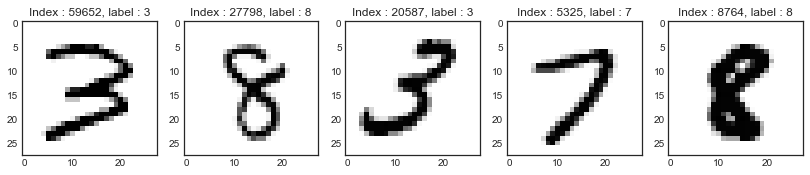

In [66]:
num_sample = 5
random_idxs = np.random.randint(60000, size=num_sample)
print(random_idxs)
plt.figure(figsize=(14,8))

for i, idx in enumerate(random_idxs):
   img = x_train_full[idx, :]
   label = y_train_full[idx]

   plt.subplot(1, len(random_idxs), i+1)
   plt.imshow(img)
   plt.title(f"Index : {idx}, label : {label}")
plt.show()

In [67]:
y_train[0]

8

### 데이터 전처리
- Normalization

In [68]:
x_train = x_train/255.0
x_val = x_val /255.0
x_test = x_test / 255.0

In [69]:
y_train = to_categorical(y_train)

In [70]:
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 모델 구성 (Sequential)

### 시퀀셜로 모델 작성

In [71]:
model = Sequential([
    Flatten(input_shape=(28,28), name='flatten'),
    Dense(100 ,activation='relu', name='dense'),
    Dense(64, activation='relu', name='dense2'),
    Dense(32, activation='relu', name='dense3'),
    Dense(10, activation='softmax', name='output')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


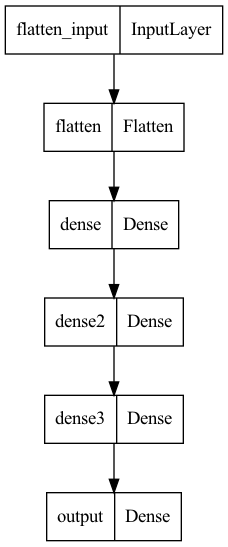

In [72]:
plot_model(model)

In [73]:
model.layers[0]

### 함수로 모델 작성

In [74]:
from keras.activations import relu

inputs = Input(shape=(28,28), name='Inputs')
Flattens = Flatten(input_shape=(28,28), name='Flatten')(inputs)
Dense1 = Dense(100, activation='relu', name='dense')(Flattens)
Dense2 = Dense(64,activation='relu', name='dense2')
Dense2 = Dense2(Dense1)


Dense3 = Dense(32, name='dense3')(Dense2)
Dense3 = Activation(relu)(Dense3)

output = Dense(10, activation='softmax', name='output')(Dense3)

model2 = Model(inputs, output)
model2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputs (InputLayer)         [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 output (Dense)              (None, 10)                330 

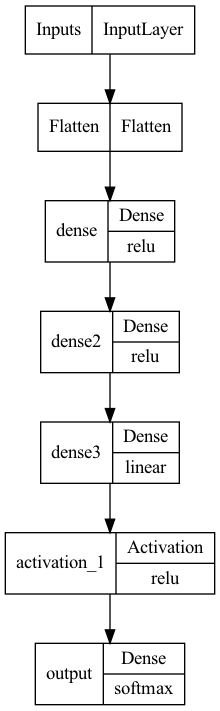

In [75]:
plot_model(model2, show_layer_activations=True)

### 모델 컴파일

In [76]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='sgd')

### 모델 가중치 확인

In [77]:
two_df,b = model2.layers[4].get_weights()
model2.layers[4]

In [78]:
model_test2 = Sequential([
    Dense(1, input_dim=1,activation='linear', name='output')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


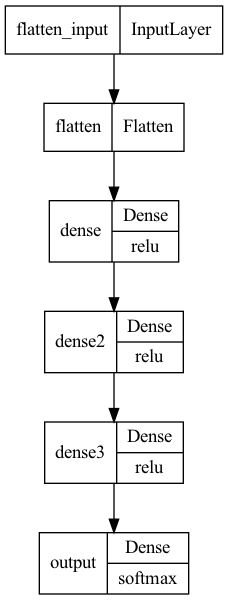

In [79]:
plot_model(model, show_layer_activations=True)

In [80]:
w = model.get_weights()

In [81]:
w[0][0]

array([-0.0448291 , -0.07045228, -0.03970141, -0.03801474,  0.08172037,
       -0.04621474, -0.05082167,  0.04305938,  0.06452572, -0.0459083 ,
       -0.05051406,  0.0325845 ,  0.01277189,  0.02151617,  0.0076413 ,
        0.04469706,  0.01832774, -0.08143746,  0.01748087, -0.05049402,
        0.04002975,  0.07911374, -0.06057718,  0.01761838, -0.02452137,
        0.06224316, -0.06206156, -0.03668119,  0.00287227, -0.07571957,
        0.07946321,  0.02304797,  0.01772873,  0.00352664,  0.06784143,
       -0.07201482,  0.01719761, -0.01341492, -0.06126389, -0.0624708 ,
       -0.03402355, -0.00407051, -0.06300061,  0.07449725,  0.02003877,
       -0.05347624,  0.00195805,  0.05556992, -0.04853503,  0.0758967 ,
       -0.00594617, -0.05217084,  0.01286095,  0.07176656,  0.06485729,
       -0.0590271 ,  0.0037073 ,  0.06514136,  0.00899315,  0.01567891,
        0.07888015, -0.06713588, -0.00770934, -0.07847421, -0.07836584,
       -0.04164962, -0.00664043,  0.02034554, -0.00744472, -0.07

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [82]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/50


2022-08-11 23:15:36.684935: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-11 23:15:36.813883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


328/329 [============================>.] - ETA: 0s - loss: 1.6825 - acc: 0.5095

2022-08-11 23:15:39.849777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 4s 12ms/step - loss: 1.6822 - acc: 0.5096 - val_loss: 0.9621 - val_acc: 0.7749
Epoch 2/50
329/329 [==============================] - 4s 13ms/step - loss: 0.6800 - acc: 0.8292 - val_loss: 0.5311 - val_acc: 0.8517
Epoch 3/50
329/329 [==============================] - 4s 11ms/step - loss: 0.4660 - acc: 0.8714 - val_loss: 0.4191 - val_acc: 0.8793
Epoch 4/50
329/329 [==============================] - 4s 11ms/step - loss: 0.3920 - acc: 0.8898 - val_loss: 0.3732 - val_acc: 0.8909
Epoch 5/50
329/329 [==============================] - 3s 10ms/step - loss: 0.3499 - acc: 0.9003 - val_loss: 0.3319 - val_acc: 0.9044
Epoch 6/50
329/329 [==============================] - 3s 10ms/step - loss: 0.3205 - acc: 0.9089 - val_loss: 0.3188 - val_acc: 0.9062
Epoch 7/50
329/329 [==============================] - 3s 10ms/step - loss: 0.2977 - acc: 0.9150 - val_loss: 0.3170 - val_acc: 0.9062
Epoch 8/50
329/329 [==============================] - 3s 10ms/step - loss: 0.279

### 학습 결과 시각화

In [83]:
epochs = np.arange(1, 51)
epochs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [84]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

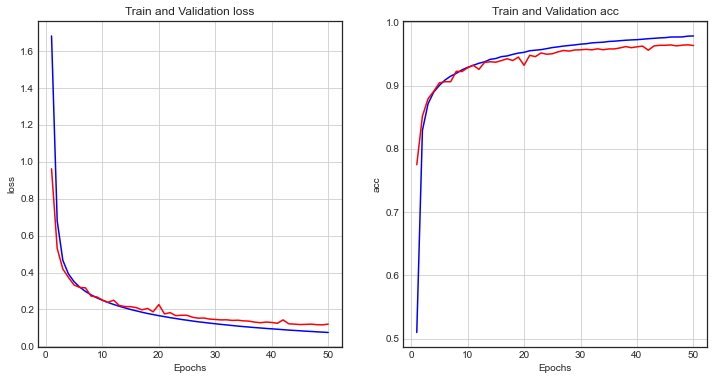

In [85]:
history_dict = history.history

loss = history_dict['loss']
val_loss =history_dict['val_loss']
epochs = np.arange(1, 51)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot( epochs,loss, color='blue', label='train_loss')
plt.plot( epochs,val_loss, color='red', label='val_loss')
plt.title('Train and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.subplot(1,2,2)
plt.plot(epochs, acc, color='blue', label='acc')
plt.plot(epochs, val_acc, color='red', label='val_acc')
plt.title('Train and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.grid()
plt.show()

### 모델 평가 (1)
- evaluate

In [86]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1220 - acc: 0.9644


[0.1220058873295784, 0.964400053024292]

### 학습된 모델을 통해 값 예측

In [87]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=1)
print(pred_ys[0])

 74/313 [======>.......................] - ETA: 0s

2022-08-11 23:18:30.247196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
(10000, 10)
[7.3e-08 5.7e-08 1.3e-06 4.0e-05 2.3e-09 3.2e-07 2.5e-11 1.0e+00 9.8e-08
 9.6e-07]


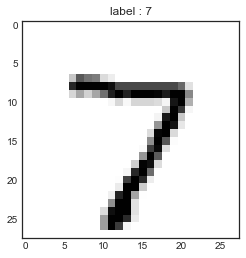

In [88]:
arg_pred_y= np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title("label : {}".format(arg_pred_y[0]))
plt.show()

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
sns.set(style='white')

In [90]:
np.argmax(y_test, axis=-1)

p=np.array([[1,2,3,4],[5,6,7,8]])
c=p.reshape(2,-1)
c.sum(axis=-1)
#p.shape
#y_test

array([10, 26])

In [91]:
c

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

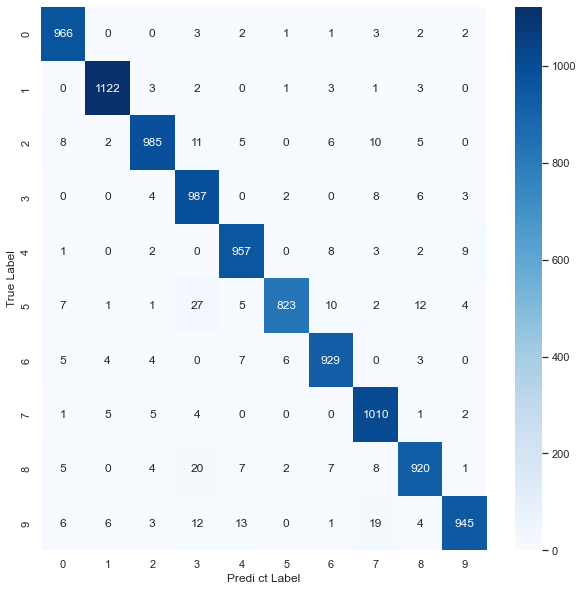

In [92]:
plt.figure(figsize=(10,10))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predi ct Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- 분류 보고서

In [93]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.95      0.96      1032
           3       0.93      0.98      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.99      0.92      0.95       892
           6       0.96      0.97      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [94]:
from keras.models import load_model
model.save('mnist_model.h5')

In [95]:
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

In [96]:
load_model = load_model('mnist_model.h5')
load_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [97]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=1)
print(pred_ys[0])




313/313 [==============================] - 1s 2ms/step
(10000, 10)
[7.3e-08 5.7e-08 1.3e-06 4.0e-05 2.3e-09 3.2e-07 2.5e-11 1.0e+00 9.8e-08
 9.6e-07]


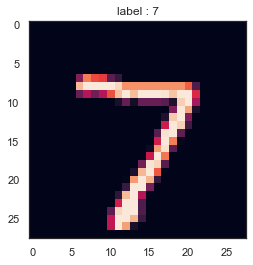

In [98]:
arg_pred_y = np.argmax(pred_ys, axis=1)
plt.imshow(x_test[0])
plt.title("label : {}".format(arg_pred_y[0]))
plt.show()

## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [99]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard


In [100]:
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=111)

### 데이터 확인
num_x_train = (x_train.shape[0])
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]
print(f"학습 데이터 : {x_train_full.shape} \t 레이블 : {y_train_full.shape}")
print(f"학습 데이터 : {x_train.shape} \t 레이블 : {y_train.shape}")
print(f"검증 데이터 : {x_val.shape} \t 레이블 : {y_val.shape}")
print(f"테스트 데이터 : {x_test.shape} \t 레이블 : {y_test.shape}")

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

def build_mode():
    inputs =Input(shape=(28,28,1))
    x =Flatten(input_shape=(28,28,1))
    x = x(inputs)
    x = Dense(100, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputs, x)

    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd', metrics=['acc'])
    return model

model = build_mode()
model.summary()


학습 데이터 : (60000, 28, 28) 	 레이블 : (60000,)
학습 데이터 : (42000, 28, 28) 	 레이블 : (42000,)
검증 데이터 : (18000, 28, 28) 	 레이블 : (18000,)
테스트 데이터 : (10000, 28, 28) 	 레이블 : (10000,)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 64)                6464      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)     

### ModelCheckpoint

In [101]:
check_point_cb = ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=5, callbacks=check_point_cb)

Epoch 1/5
  14/1313 [..............................] - ETA: 10s - loss: 2.3206 - acc: 0.1161

2022-08-11 23:18:32.372549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 10s 8ms/step - loss: 0.8207 - acc: 0.7716
Epoch 2/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3234 - acc: 0.9076
Epoch 3/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.2570 - acc: 0.9257
Epoch 4/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2163 - acc: 0.9372
Epoch 5/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1878 - acc: 0.9463


In [102]:
from keras.models import load_model

model =load_model('keras_mnist_model.h5')

In [103]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 64)                6464      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable

최상의 모델만을 저장
- save_best_only=True

In [104]:
model = build_mode()

cp = ModelCheckpoint('keras_best_model.h5', save_best_only=True, monitor='acc')

In [105]:
history = model.fit(
    x_train, y_train, epochs=5
    ,validation_data=(x_val, y_val), callbacks=cp
)

Epoch 1/5
  15/1313 [..............................] - ETA: 10s - loss: 2.3078 - acc: 0.1271

2022-08-11 23:19:24.591492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1312/1313 [============================>.] - ETA: 0s - loss: 0.8713 - acc: 0.7495

2022-08-11 23:19:34.456754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 13s 10ms/step - loss: 0.8711 - acc: 0.7495 - val_loss: 0.3747 - val_acc: 0.8914
Epoch 2/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3283 - acc: 0.9065 - val_loss: 0.2971 - val_acc: 0.9125
Epoch 3/5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.2598 - acc: 0.9249 - val_loss: 0.2426 - val_acc: 0.9292
Epoch 4/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.2188 - acc: 0.9378 - val_loss: 0.2195 - val_acc: 0.9347
Epoch 5/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.1895 - acc: 0.9456 - val_loss: 0.1922 - val_acc: 0.9436


In [106]:
model_load = load_model('keras_best_model.h5')
model_load.summary()
!ls -al

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 100)               78500     
                                                                 
 dense_26 (Dense)            (None, 64)                6464      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable

### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

In [107]:
model = build_mode()

cp = ModelCheckpoint('keras_best_model_stopping.h5', save_best_only=True, monitor='acc')
stopping_cb = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
history = model.fit(
    x_train, y_train, epochs=50
    , validation_data=(x_val, y_val), callbacks=[cp,stopping_cb]
)

Epoch 1/50
  15/1313 [..............................] - ETA: 10s - loss: 2.2956 - acc: 0.1042

2022-08-11 23:20:31.331564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1312/1313 [============================>.] - ETA: 0s - loss: 0.9019 - acc: 0.7292

2022-08-11 23:20:41.711403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 14s 10ms/step - loss: 0.9016 - acc: 0.7292 - val_loss: 0.3994 - val_acc: 0.8819
Epoch 2/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3454 - acc: 0.9004 - val_loss: 0.3094 - val_acc: 0.9076
Epoch 3/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.2714 - acc: 0.9219 - val_loss: 0.2485 - val_acc: 0.9273
Epoch 4/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.2264 - acc: 0.9355 - val_loss: 0.2199 - val_acc: 0.9352
Epoch 5/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.1950 - acc: 0.9445 - val_loss: 0.2013 - val_acc: 0.9409
Epoch 6/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.1718 - acc: 0.9495 - val_loss: 0.1810 - val_acc: 0.9465
Epoch 7/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.1538 - acc: 0.9554 - val_loss: 0.1724 - val_acc: 0.9486
Epoch 8/50
1313/1313 [==============================] - 13s

KeyboardInterrupt: 

### LearningRateScheduler

In [108]:
def schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


In [109]:
model = build_mode()

round(model.optimizer.lr.numpy(), 5)

0.01

In [112]:
lr_s_cb = LearningRateScheduler(schedule)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_s_cb],verbose=0)
round(model.optimizer.lr.numpy(), 5)

KeyboardInterrupt: 

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

In [113]:
TensorBoard(log_dir='.loss', histogram_freq=0,  write_graph=True, write_images=True)

In [115]:
log_dir = './logs'

tensor_board_cb = [TensorBoard(log_dir=log_dir, histogram_freq=1,  write_graph=True, write_images=True)]


model = build_mode()

history = model.fit(
    x_train, y_train, epochs=5
    , validation_data=(x_val, y_val), batch_size=32, callbacks=tensor_board_cb
)

Epoch 1/5
  12/1313 [..............................] - ETA: 12s - loss: 2.3026 - acc: 0.1094

2022-08-11 23:52:32.617951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1312/1313 [============================>.] - ETA: 0s - loss: 0.8460 - acc: 0.7566

2022-08-11 23:52:43.760590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - 15s 12ms/step - loss: 0.8458 - acc: 0.7566 - val_loss: 0.3900 - val_acc: 0.8843
Epoch 2/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3370 - acc: 0.9024 - val_loss: 0.3033 - val_acc: 0.9117
Epoch 3/5
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2688 - acc: 0.9225 - val_loss: 0.2481 - val_acc: 0.9297
Epoch 4/5
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2272 - acc: 0.9347 - val_loss: 0.2280 - val_acc: 0.9334
Epoch 5/5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.1984 - acc: 0.9429 - val_loss: 0.2003 - val_acc: 0.9413


In [116]:
log_dir = './logs'
%load_ext tensorboard

load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000

In [120]:
%tensorboard --logdir {log_dir}

Launching TensorBoard...